In [9]:
import dataset
import classificationModel
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import OrdinalEncoder
from torch.utils.data import random_split

In [10]:
categories = ["chirping_birds", "crackling_fire", "hand_saw", "chainsaw", "helicopter"]
audio_path = './ESC-50/audio/'
meta_path = './ESC-50/meta/'
nothing_path = './room_sounds/'

data = pd.read_csv(meta_path + 'esc50.csv')

## Remove rows where the category does not belong to categories
data = data[data.category.isin(categories)]

re_encoder = OrdinalEncoder(dtype=np.long)
re_encoder.fit(data[["category"]])
data[["category"]] = re_encoder.transform(data[["category"]])

print(re_encoder.inverse_transform(np.array([0,1,2,3,4]).reshape(-1,1)))
data

[['chainsaw']
 ['chirping_birds']
 ['crackling_fire']
 ['hand_saw']
 ['helicopter']]


,filename,fold,target,category,esc10,src_file,take
1,1-100038-A-14.wav,1,14,1,False,100038,A
24,1-116765-A-41.wav,1,41,0,True,116765,A
54,1-17150-A-12.wav,1,12,2,True,17150,A
55,1-172649-A-40.wav,1,40,4,True,172649,A
56,1-172649-B-40.wav,1,40,4,True,172649,B
...,...,...,...,...,...,...,...
1960,5-253094-D-49.wav,5,49,3,False,253094,D
1961,5-253101-A-49.wav,5,49,3,False,253101,A
1962,5-253101-B-49.wav,5,49,3,False,253101,B
1963,5-253101-C-49.wav,5,49,3,False,253101,C


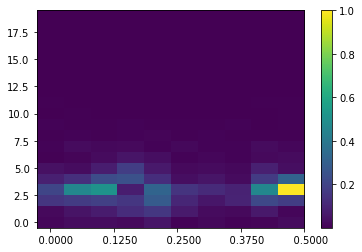

In [14]:
ds = dataset.SoundDS(data,audio_path,False,0)
ds.augmentations = []
audio = ds.getAudio(145)
melvec = ds[145][0]
dataset.AudioUtil.displayMelspec(melvec)
dataset.AudioUtil.playSound(audio)
datatruc = np.rint(audio[0].numpy() * (2**12)).astype(np.int16)
np.savetxt("audio.txt",datatruc,fmt='%i')